# first network read+print
* we took the mamalia-primate-18
* we want to read it and take it and read into networkx
* print it using matplotlib


In [2]:
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# own code
import graph_tools as gtl
import invarients as inva


this is a test for a simple graph to see the interactions

/home/eldad/.local/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


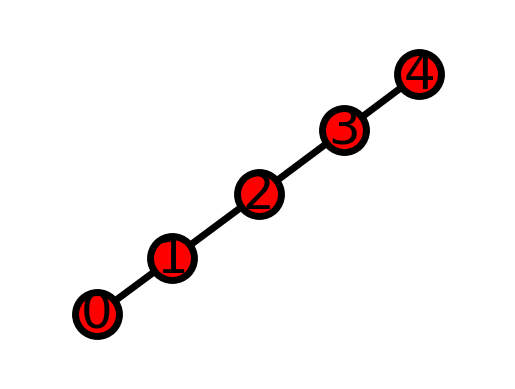

In [3]:
G = nx.Graph()
for i in range(5):
    G.add_node(i)

for i in range(4):
    G.add_edge(*(i, i + 1))

options = {
    "font_size": 36,
    "node_size": 1000,
    "node_color": (1, 0, 0),
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


now we read the mammalia graph

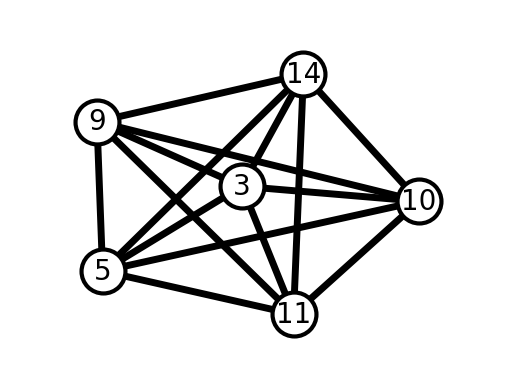

In [4]:
f = open("networks/mamalia-primate-18/graph.edges", "r")
edges = {}
nodes = set()
for line in f:
    split = line.split(" ")
    edge = [int(split[0]), int(split[1])]
    edge.sort()
    nodes.add(edge[0])
    nodes.add(edge[1])
    weight = float(split[2])
    edges[tuple(edge)] = weight

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges.keys())
options = {
    "font_size": 20,
    "node_size": 1000,
    "node_color": (1, 1, 1),
    "edgecolors": "black",
    "linewidths": 3,
    "width": 5,
}
nx.draw_networkx(G, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


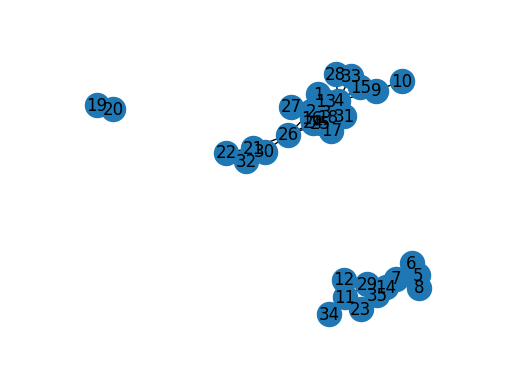

In [5]:
g_reptil = gtl.read_graph_from_edgelist("networks/net1/reptilia-tortoise-network-pv.edges")
options = {
    "font_size": 20,
    "node_size": 1000,
    "node_color": (1, 1, 1),
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
}
nx.draw_networkx(g_reptil)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
